<img src='img/fastcamp_h.png'>

# 9강. Dimensionality reduction

# 이번장에서 배우는 것들
* 차원 축소의 개념
* PCA
* autoncoder
* convolutional autoencoder
* variational autoencoder

# 적절한 차원과 성능

<center><img src='img/09_02.png'></center>

* 1차원 feature

<center><img src='img/09_03.png'></center>

* 2차원 feature

<center><img src='img/09_04.png'></center>

* overfitting 의 예

<center><img src='img/09_05.png'></center>

* 좀 더 나은 분류의 예

<center><img src='img/09_06.png'></center>

* 3차원 feature

<center><img src='img/09_07.png'></center>

* 완벽한 분류가 가능

# 차원의 저주

* 고차원은 언제나 올바른 방법인가?

<center><img src='img/09_08.png'></center>

* 각 차원의 데이터를 유니크하게 구분하기 위해서는 차원이 늘어날 수록 훨씬 더 많은 데이터가 필요하게 됨
* 차원이 증가하면 각 알고리즘의 컴퓨팅 파워도 급격히 증가하게 됨
* 데이터가 커지면 필요 메모리와 용량도 증가하게 됨

<center><img src='img/09_01.png'></center>

* 결과적으로 차원이 적당하게 늘어나면 성능이 증가하지만 그 후로는 급격히 감소함 (크게 데이터 부족)

# Dimensionality reduction

* 주어진 데이터를 효과적으로 나타내는 차원을 남기고 다른 차원을 줄이거나 합치는 것

### 얻어지는 효과
* 같은 규모의 데이터셋의 용량을 축소 할 수 있음
* 컴퓨팅 파워 감소
* 가시적으로 데이터를 파악하기 용이해짐

# PCA (principal component analysis)

* LDA (Linear Discriminant Analysis) 와 함께 가장 대표적인 차원축소 알고리즘
* 원하는 개수의 축소된 차원으로 현재 차원을 줄일 수 있음

<center><img src='img/09_09.png' height=50% width=50%></center>

# PCA 알고리즘

* 주어진 데이터 셋을 z-score로 변환
* 데이터셋에서 분산이 최대인 축을 mse로 탐색 (pc1)
* 분산이 최대인 축(pc1)을 찾으면 pc1과 직교하는 다른 차원의 분산이 최대인 축을 찾음(pc2)
* pc1과 pc2에 직교하는 3번째 pc3을 찾음 .. (반복)

<center><img src='img/09_10.png' height=50% width=50%></center>
<center><img src='img/09_01.gif' height=50% width=50%></center>

In [7]:
#pca 구하기

from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)) /255.

from sklearn.decomposition import PCA

pca = PCA()
# 28 * 28 dimension을 가진 mnist를 2차원으로 투영
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
#pc별 분산 비율을 획득
print(pca.explained_variance_ratio_)

[9.70466436e-02 7.09592406e-02 6.16908876e-02 5.38941949e-02
 4.86879702e-02 4.31223132e-02 3.27192995e-02 2.88389545e-02
 2.76202940e-02 2.35700055e-02 2.10918962e-02 2.02299108e-02
 1.71581820e-02 1.69211143e-02 1.57864128e-02 1.48295261e-02
 1.32456095e-02 1.27689737e-02 1.18726294e-02 1.15268370e-02
 1.06616621e-02 1.00671337e-02 9.53573327e-03 9.12543746e-03
 8.83404692e-03 8.39319141e-03 8.12578809e-03 7.86366084e-03
 7.44733102e-03 6.90859128e-03 6.58093773e-03 6.48147870e-03
 6.02615030e-03 5.86582188e-03 5.70021474e-03 5.43627771e-03
 5.05786416e-03 4.87858604e-03 4.81429342e-03 4.72266326e-03
 4.56746921e-03 4.44836012e-03 4.18501329e-03 3.98215339e-03
 3.84974607e-03 3.75103387e-03 3.62008852e-03 3.51591277e-03
 3.40058205e-03 3.21874467e-03 3.19017051e-03 3.12804939e-03
 2.95982668e-03 2.88954600e-03 2.84130398e-03 2.71435811e-03
 2.69521453e-03 2.58472546e-03 2.53770594e-03 2.44780960e-03
 2.40506133e-03 2.39262901e-03 2.30408489e-03 2.21532131e-03
 2.13720816e-03 2.072252

In [20]:
#pc 2까지의 pc로 64%의 정보를 복원 가능함
print(sum(pca.explained_variance_ratio_ [:2])/ sum(pca.explained_variance_ratio_))

0.25679449048057473


In [25]:
pca = PCA(n_components = 0.1)
# 28 * 28 dimension을 가진 mnist를 2차원으로 투영
pca.fit(x_train)
print(pca.n_components_)

2


In [29]:
# 28 * 28 차원을 2차원으로 축소
encoded = pca.transform(x_train)
print(encoded.shape, x_train.shape, y_train.shape)

(60000, 2) (60000, 784) (60000,)


3.0.3


AttributeError: 'PathCollection' object has no attribute 'legend_elements'

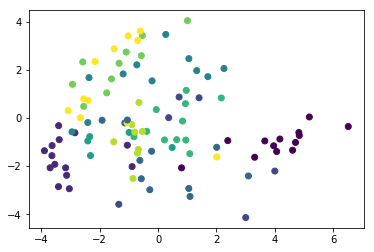

In [48]:
import matplotlib.pylab as plt
import matplotlib
print(matplotlib.__version__)

scatter = plt.scatter(x=encoded[:100,0], y=encoded[:100,1], c=y_train[:100])
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")



plt.legend(handles=[scatter])
plt.show()